In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Regression Analysis
Steps in Regression Analysis
1. Research question
2. collect and prepare data
3. visualize data
4. check assumption
5. fit the model
6. interpret the result
7. validate model
8. report result

### 1. Research Question
In this problem I am going to predict the price of smartphone based on given feature ============== 
predicting the price and also want to analyze the relation between input feature === inference and prediction problem
price == output variable

### 2. Collecting and Preparing Data

In [3]:
# reading data
pd.set_option("display.max_columns",None)

df = pd.read_csv("smartphones.csv")
print(df.shape)
df.sample(5)

(980, 26)


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
104,oppo,OPPO F19 Pro Plus 5G,19990,82.0,True,False,False,dimensity,8.0,2.40,4310.0,1,50.0,8.0,128.0,6.43,60,4,1.0,android,48.0,16.0,1,256.0,1080,2400
962,doogee,Doogee S99,14999,84.0,False,True,False,helio,8.0,2.05,6000.0,1,33.0,8.0,128.0,6.30,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2340
925,micromax,Micromax IN 2B (6GB RAM + 64GB),7790,68.0,False,False,False,unisoc,8.0,1.80,5000.0,0,NaN,6.0,64.0,6.52,60,2,1.0,android,13.0,5.0,1,256.0,720,1600
779,vivo,Vivo V11i,20990,70.0,False,False,False,helio,8.0,2.00,3315.0,0,NaN,4.0,128.0,6.30,60,2,1.0,android,16.0,25.0,1,256.0,1080,2280
518,vivo,Vivo Y01,7999,61.0,False,False,False,helio,8.0,2.30,5000.0,0,NaN,2.0,32.0,6.51,60,1,1.0,android,8.0,5.0,1,1024.0,720,1600


In [4]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [5]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [6]:
mean_rating = df.groupby("brand_name")["rating"].mean().reset_index()

temp_df = df.merge(mean_rating, on=["brand_name"],how="left", suffixes=["","_mean"])
temp_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,rating_mean
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216,82.236842
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412,82.236842
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,78.724138
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400,80.104167
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412,76.445652


In [7]:
temp_df.rating.fillna(round(temp_df.rating_mean,2), inplace=True)

In [8]:
temp_df[temp_df.rating.isnull()].index.values

array([190, 817], dtype=int64)

In [9]:
temp_df.drop(index=[190,817], inplace=True)

In [10]:
temp_df.drop(columns= ["model","rating_mean"], inplace=True)

In [11]:
temp_df.sample(2)

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
807,xiaomi,17999,81.0,False,False,True,helio,8.0,2.05,5000.0,1,67.0,6.0,128.0,6.67,120,4,1.0,android,108.0,16.0,1,1024.0,1080,2400
658,xiaomi,19999,81.0,False,False,True,snapdragon,8.0,2.30,5020.0,1,33.0,6.0,64.0,6.67,120,4,1.0,android,108.0,16.0,1,512.0,1080,2400


In [12]:
# categorical columns = brand_name, has_5g, has_nfc, has_ir_blaster, processor_brand,os,extended_upto

In [13]:
temp_df.isnull().sum(), temp_df.shape

(brand_name                     0
 price                          0
 rating                         0
 has_5g                         0
 has_nfc                        0
 has_ir_blaster                 0
 processor_brand               20
 num_cores                      6
 processor_speed               42
 battery_capacity              11
 fast_charging_available        0
 fast_charging                209
 ram_capacity                   0
 internal_memory                0
 screen_size                    0
 refresh_rate                   0
 num_rear_cameras               0
 num_front_cameras              4
 os                            13
 primary_camera_rear            0
 primary_camera_front           5
 extended_memory_available      0
 extended_upto                478
 resolution_width               0
 resolution_height              0
 dtype: int64,
 (978, 25))

In [14]:
temp_df = temp_df[temp_df["brand_name"] != "ikall"]

In [15]:
# filling value from online search
"""
200,307,523,575,911 = "exynos"
910,490,143,753 = mediatek
799,800,952,979 = snapdradon
844,118 = arm
313,769 = unisoc
"""


'\n200,307,523,575,911 = "exynos"\n910,490,143,753 = mediatek\n799,800,952,979 = snapdradon\n844,118 = arm\n313,769 = unisoc\n'

In [16]:
temp_df.loc[[200,307,523,575,911],"processor_brand"] = ["exynos" for i in range(5)]
temp_df.loc[[799,800,952,979],"processor_brand"] = ["snapdragon" for i in range(4)]
temp_df.loc[[910,490,143,753],"processor_brand"] = ["mediatek" for i in range(4)]
temp_df.loc[[313,769],"processor_brand"] = ["unisoc", "unisoc"]
temp_df.loc[[844,118],"processor_brand"] = ["arm","arm"]

In [17]:
temp_df[temp_df.processor_brand.isnull()]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height


In [18]:
temp_df.isnull().sum()

brand_name                     0
price                          0
rating                         0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                0
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                206
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            13
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                478
resolution_width               0
resolution_height              0
dtype: int64

In [19]:
temp_df.fast_charging.value_counts()

fast_charging
33.0     152
18.0     128
67.0      65
25.0      53
120.0     46
15.0      43
80.0      42
66.0      37
10.0      33
30.0      32
65.0      30
44.0      23
45.0      17
20.0      10
68.0       8
100.0      7
150.0      7
125.0      6
22.0       5
40.0       5
60.0       4
55.0       3
21.0       2
210.0      2
50.0       2
180.0      1
200.0      1
240.0      1
19.0       1
135.0      1
165.0      1
27.0       1
Name: count, dtype: int64

In [20]:
temp_df.extended_upto.value_counts()

extended_upto
1024.0    263
512.0     116
256.0     100
128.0       7
2048.0      6
32.0        3
64.0        2
Name: count, dtype: int64

In [21]:
fast_charging_values = temp_df.fast_charging.values
extended_values = temp_df.extended_upto.values

In [22]:
fast_charging_values[:10], extended_values[:10]

(array([100.,  33.,  15.,  nan,  67.,  25.,  nan, 120.,  33.,  80.]),
 array([  nan, 1024., 1024., 1024.,   nan, 1024.,   nan,   nan,   nan,
          nan]))

In [23]:
temp_df.drop(columns=["fast_charging","extended_upto"], inplace=True)

In [24]:
temp_df.isnull().sum()

brand_name                    0
price                         0
rating                        0
has_5g                        0
has_nfc                       0
has_ir_blaster                0
processor_brand               0
num_cores                     6
processor_speed              42
battery_capacity             11
fast_charging_available       0
ram_capacity                  0
internal_memory               0
screen_size                   0
refresh_rate                  0
num_rear_cameras              0
num_front_cameras             4
os                           13
primary_camera_rear           0
primary_camera_front          5
extended_memory_available     0
resolution_width              0
resolution_height             0
dtype: int64

In [25]:
"""
152,444,706 = 3.46
262 = 6cores, 2.49
280= 3.23
425 = 2.4, 8
"""

temp_df.loc[[152,444,706],["num_cores","processor_speed"]] = [[6,3.46] for i in range(3)]
temp_df.loc[[262],["num_cores","processor_speed"]] = [[6,2.49]]
temp_df.loc[[280],["num_cores","processor_speed"]] = [[6,3.23]]
temp_df.loc[[425],["num_cores","processor_speed"]] = [[8,2.4]]

In [26]:
temp_df[temp_df.num_cores.isnull()]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height


In [27]:
temp_df.isnull().sum()

brand_name                    0
price                         0
rating                        0
has_5g                        0
has_nfc                       0
has_ir_blaster                0
processor_brand               0
num_cores                     0
processor_speed              36
battery_capacity             11
fast_charging_available       0
ram_capacity                  0
internal_memory               0
screen_size                   0
refresh_rate                  0
num_rear_cameras              0
num_front_cameras             4
os                           13
primary_camera_rear           0
primary_camera_front          5
extended_memory_available     0
resolution_width              0
resolution_height             0
dtype: int64

In [28]:
temp_df.loc[[27,100,209,288,398,416,739,789,892],"processor_speed"] = [3.46 for i in range(9)]
temp_df.loc[[206,523,640,804,910],"processor_speed"] = [2.4 for i in range(5)]
temp_df.loc[[122,129,799,802,805],"processor_speed"] = [2.80 for i in range(5)]
temp_df.loc[[224,668,911],"processor_speed"] = [2.6,2.6,2.6]
temp_df.loc[[241,800,844],"processor_speed"] = [2.2,2.2,2.2]
temp_df.loc[[78],"processor_speed"] = 2.6
temp_df.loc[[118,735],"processor_speed"] = [2.5,2.5]
temp_df.loc[[380,979],"processor_speed"] = 1.8
temp_df.loc[[740,973],"processor_speed"] = [3.0,3.0]
temp_df.loc[[255],"processor_speed"] = 2.99
temp_df.loc[[362],"processor_speed"] = 3.4
temp_df.loc[[490],"processor_speed"] = 2.35
temp_df.loc[[845],"processor_speed"] = 2.91

In [29]:
temp_df[temp_df.processor_speed.isnull()]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height


In [30]:
temp_df.loc[[149,305,361,111,613,824,880,881],"battery_capacity"] = [2815 for i in range(8)]
temp_df.loc[[435],"battery_capacity"] = 2018
temp_df.loc[[444],"battery_capacity"] = 3274
temp_df.loc[[737],"battery_capacity"] = 1624

In [31]:
temp_df[temp_df.battery_capacity.isnull()]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height


In [32]:
temp_df.os.fillna("android", inplace=True)

In [33]:
temp_df[temp_df.os.isnull()]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height


In [34]:
temp_df.loc[69, ["num_front_cameras","primary_camera_front"]] = [3,50]
temp_df.loc[458, ["num_front_cameras","primary_camera_front"]] = [0,0]
temp_df.loc[954, ["num_front_cameras","primary_camera_front"]] = [3,40]
temp_df.loc[972, ["num_front_cameras","primary_camera_front"]] = [1,2]
temp_df.loc[599, "primary_camera_front"] = 64

In [35]:
temp_df.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,oneplus,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,1440,3216
1,oneplus,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1080,2412
2,samsung,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1080,2408
3,motorola,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1080,2400
4,realme,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,1080,2412


In [36]:
temp_df.isnull().sum()

brand_name                   0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_width             0
resolution_height            0
dtype: int64

In [37]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 975 non-null    object 
 1   price                      975 non-null    int64  
 2   rating                     975 non-null    float64
 3   has_5g                     975 non-null    bool   
 4   has_nfc                    975 non-null    bool   
 5   has_ir_blaster             975 non-null    bool   
 6   processor_brand            975 non-null    object 
 7   num_cores                  975 non-null    float64
 8   processor_speed            975 non-null    float64
 9   battery_capacity           975 non-null    float64
 10  fast_charging_available    975 non-null    int64  
 11  ram_capacity               975 non-null    float64
 12  internal_memory            975 non-null    float64
 13  screen_size                975 non-null    float64
 14 

### Train and Test Sets

In [38]:
columns_to_encode = ["has_5g", "has_nfc","has_ir_blaster"]
temp_df = pd.get_dummies(temp_df, columns=columns_to_encode, drop_first=True)

In [39]:
temp_df.replace({True: 1, False: 0}, inplace=True)

In [40]:
temp_df.head()

,brand_name,price,rating,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_True,has_nfc_True,has_ir_blaster_True
0,oneplus,54999,89.0,snapdragon,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,1440,3216,1,1,0
1,oneplus,19989,81.0,snapdragon,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1080,2412,1,0,0
2,samsung,16499,75.0,exynos,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1080,2408,1,0,0
3,motorola,14999,81.0,snapdragon,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1080,2400,1,0,0
4,realme,24999,82.0,dimensity,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,1080,2412,1,0,0


In [41]:
X = temp_df.drop(columns="price")
y = temp_df["price"]

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

### 3. Visualize Data

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


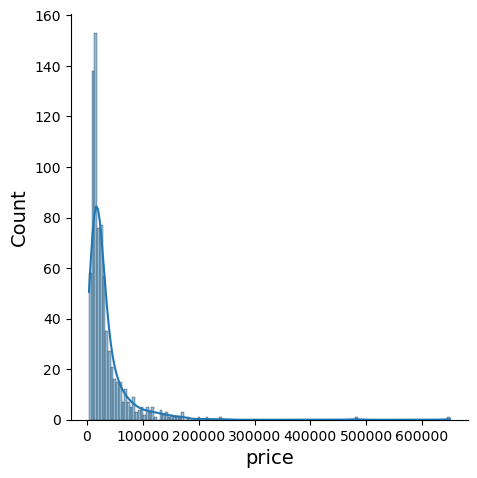

In [43]:
sns.displot(y_train, kde=True,)

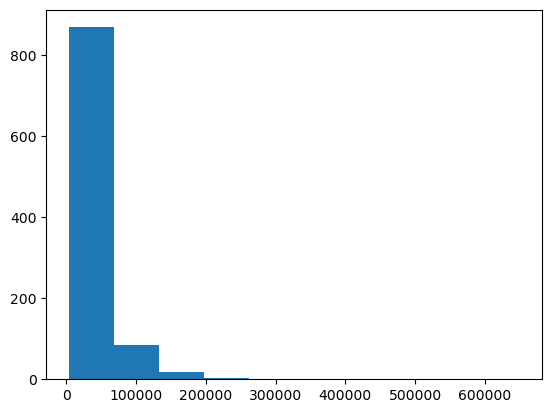

In [44]:
plt.hist(y)
plt.show()

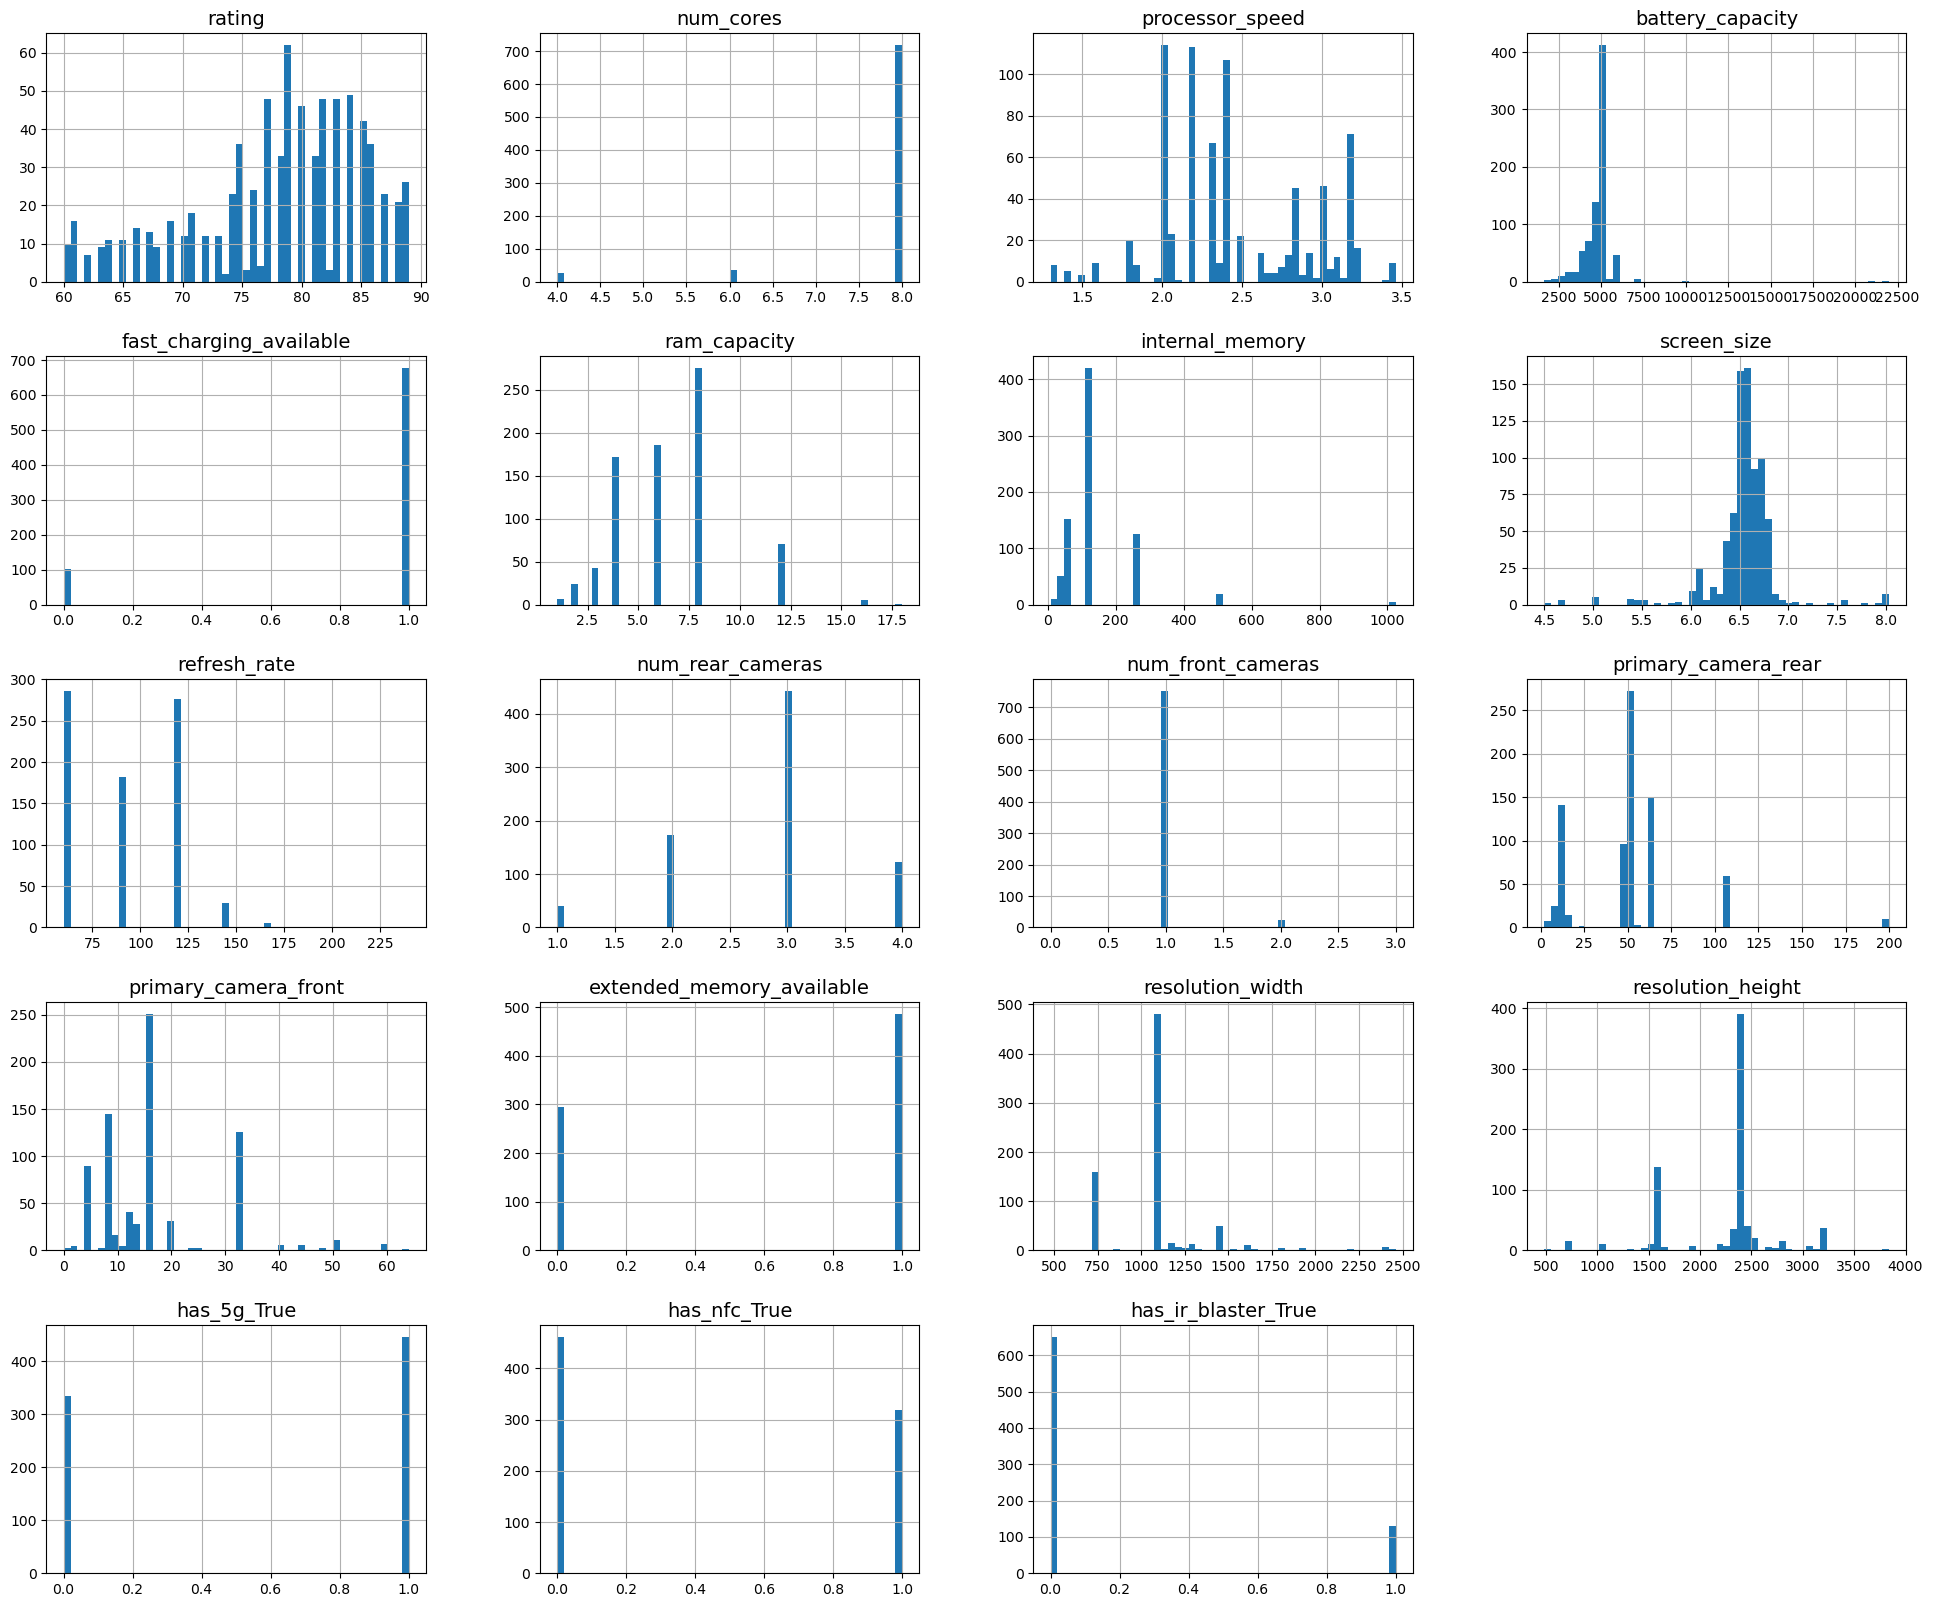

In [45]:
x_train.hist(bins=50, figsize=(24,20))
plt.show()

### Handling Categorical Values

In [46]:
x_train.sample()

,brand_name,rating,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_True,has_nfc_True,has_ir_blaster_True
697,vivo,86.0,snapdragon,8.0,2.7,4700.0,1,8.0,256.0,6.67,120,3,1.0,android,64.0,32.0,1,1080,2408,1,0,0


In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [48]:
# brand_name, processor_brand,os
train_index = x_train.index.values
test_index = x_test.index.values

categories_columns = ["brand_name","processor_brand","os"]

# Initialize an empty DataFrame for encoded data
temp_train_df = pd.DataFrame(index=train_index)
temp_test_df = pd.DataFrame(index=test_index)

for column in categories_columns:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    trained_encoded = encoder.fit_transform(x_train[[column]])
    test_encoded = encoder.transform(x_test[[column]])

    temp_train_df = pd.concat([temp_train_df, pd.DataFrame(trained_encoded, columns=encoder.categories_[0], index=train_index)], \
                                   axis=1)
    temp_test_df = pd.concat([temp_test_df, pd.DataFrame(test_encoded, columns=encoder.categories_[0], index=test_index)], \
                                   axis=1)

In [49]:
x_train = x_train.drop(columns= categories_columns)
x_test = x_test.drop(columns= categories_columns)

In [50]:
x_train = pd.concat([x_train, temp_train_df], axis=1)
x_test = pd.concat([x_test, temp_test_df], axis=1)

### 4. Check Assumptions

In [51]:
import statsmodels.api as sm
x_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_sm).fit()

In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     32.47
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          5.52e-179
Time:                        15:50:49   Log-Likelihood:                -8837.2
No. Observations:                 780   AIC:                         1.782e+04
Df Residuals:                     707   BIC:                         1.816e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Assumptions of Linear Regression
1. Linearity
2. Normality of residuals
3. Homoscedasticity(Constant variance)
4. No autocorrelation (Correlation of error terms)
5. Multicollinearity

#### Observations
- F_test ======== a large value of F statistics and very small p_value indicates that at least one input feature is linearly assosiated with output variable
- r2_score and adjusted r2 ============ difference between these two indicates that there are irrelevant features in the model
- AIC,BIC,Loglikelihood ===============
- omnibus and p value =============== large value of omnibus and p value indicates that the residuals are not normal
- Durbin-Watson ============== 2.10 indicates that the error term are not related -> no autocorrelation between residuals
- Jarque-Bera (JB) ====== high value of jb and low p value also indicates that the residuals are not normal
- condition ============ a large codition number is indicating that there is a strong multicollinearity in the data
- skew and kurtosis ======= deviate from normal distribution and high kurtosis saying fatter tell

Issues
- strong multicollinearity, residuals are not normaly distributed

In [53]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [54]:
y_hat = model_1.predict(x_train)
residuals = y_train - y_hat

### Linearity check

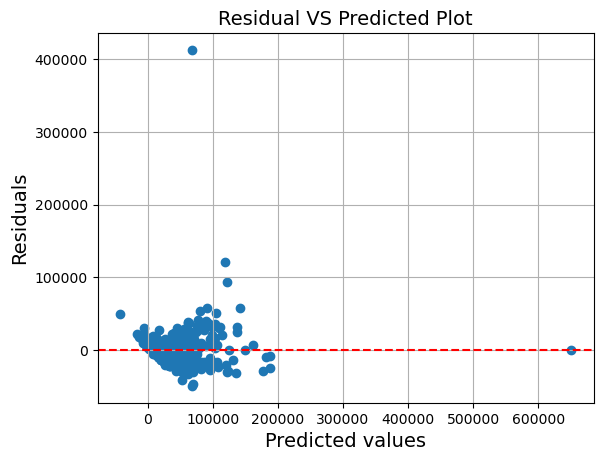

In [55]:
# linearity check
plt.scatter(y_hat,residuals)
plt.axhline(y=0,color="red",linestyle= "--")
plt.title("Residual VS Predicted Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.grid()
plt.show()

In [56]:
resid = residuals[residuals < 200000]
pre = y_hat[y_hat < 300000]

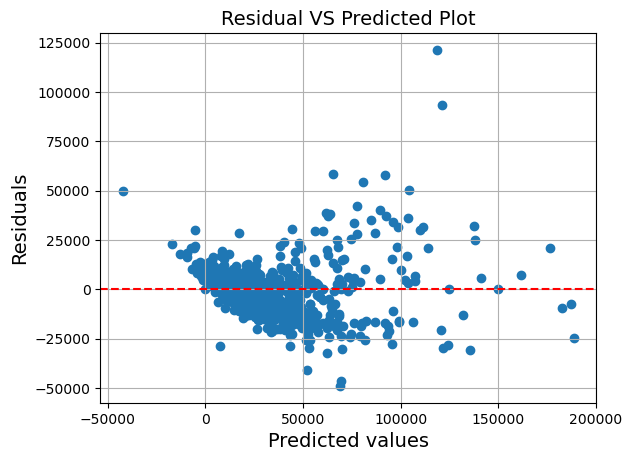

In [57]:
plt.scatter(pre,resid)
plt.axhline(y=0,color="red",linestyle= "--")
plt.title("Residual VS Predicted Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.grid()
plt.show()

In [58]:
from scipy import stats
stats.normaltest(resid)

NormaltestResult(statistic=372.435232232679, pvalue=1.3388036493370156e-81)

In [59]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# fitting linear model
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

# calculating score
lin_r2 = r2_score(y_test,lin_model.predict(x_test))
lin_mse = mean_squared_error(y_test,lin_model.predict(x_test))

# adding polynomial terms
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)

poly_r2 = r2_score(y_test,poly_model.predict(x_test_poly))
poly_mse = mean_squared_error(y_test,poly_model.predict(x_test_poly))

# Compare model performance
print("Linear model")
print(f"R-squared: {lin_r2:.4f}")
print(f"Mean Squared Error: {lin_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")

Linear model
R-squared: 0.7463
Mean Squared Error: 212162590.4255

Polynomial model
R-squared: -200.1127
Mean Squared Error: 168191498476.4293


In [60]:
y_sqrt = np.sqrt(y_train)

model2 = LinearRegression()
model2.fit(x_train,y_sqrt)

# predictions
y_pred_transform = model2.predict(x_test)

# Calculate R-squared and Mean Squared Error
r2_transformed = r2_score(np.sqrt(y_test), y_pred_transform)
tra_mse = mean_squared_error(np.sqrt(y_test),model2.predict(x_test))

# Compare the performance of the original and transformed models
print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")
print(f"Mean Squared Error: {tra_mse:.4f}")
print("===========================")


Transformed linear model
R-squared: 0.8526
Mean Squared Error: 693.9931


### Normaility of Residuals

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


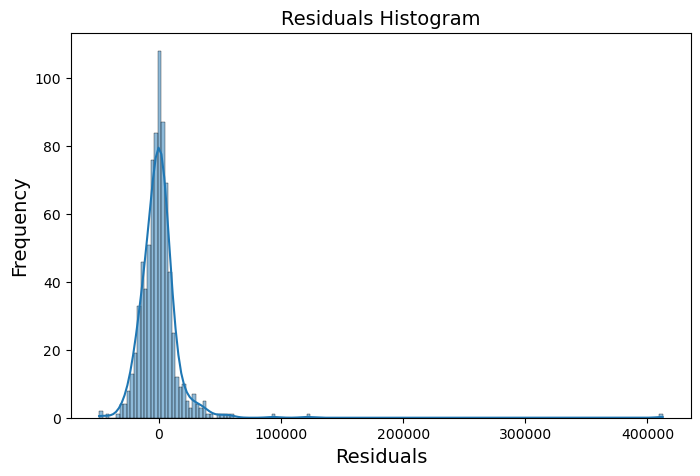

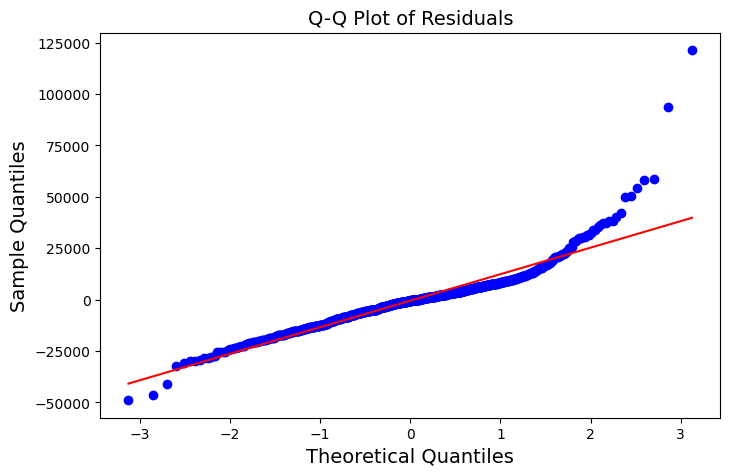

In [61]:
# histograms
plt.subplots(figsize = (8,5))
sns.histplot(residuals,kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot
plt.figure(figsize = (8,5))
stats.probplot(resid,plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [62]:
skew = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_statics,omnibus_p_value = stats.normaltest(residuals)
print(f"Skew : {skew:.2f}, \nKurtosis : {kurtosis:.2f}, \nOmnibus statistics : {omnibus_statics:.2f}, \n Omnibus test p value : {omnibus_p_value:.2f}")

Skew : 11.53, 
Kurtosis : 225.48, 
Omnibus statistics : 1390.64, 
 Omnibus test p value : 0.00


### Homoscedasticity

In [63]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test1 = het_breuschpagan(model.resid,x_sm)

print("=======================================================")
print("Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

Breusch-Pagan test results:
LM Statistic: 55.88901778891392
LM-Test p-value: 0.9665552633050541
F-Statistic: 0.7578936360791544
F-Test p-value: 0.93015147099402



### Multicollinearity

In [64]:
# condition number ==================================
print("condition number:",np.linalg.cond(x_train))

condition number: 4.323989818172036e+33


In [65]:
# correlation
x_train.corr()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_True,has_nfc_True,has_ir_blaster_True,apple,asus,blackview,blu,cola,doogee,gionee,google,honor,huawei,infinix,iqoo,itel,jio,lava,leeco,leitz,lenovo,letv,lg,lyf,micromax,motorola,nokia,nothing,nubia,oneplus,oppo,oukitel,poco,realme,redmi,royole,samsung,sharp,sony,tecno,tesla,vertu,vivo,xiaomi,zte,arm,bionic,dimensity,exynos,google,helio,kirin,mediatek,sc9863a,snapdragon,spreadtrum,tiger,unisoc,android,ios,other
rating,1.000000,0.289654,0.556288,0.067591,0.576062,0.695125,0.442120,0.311990,0.587561,0.489458,0.109204,0.500366,0.541004,-0.356071,0.370677,0.658968,0.592102,0.462126,0.144083,-0.031153,0.076902,-0.055043,0.034404,-0.020258,0.055718,-0.095460,-0.013427,0.006811,0.023617,-0.054127,0.110338,-0.255892,-0.140171,-0.008331,-0.064981,0.054281,0.054281,-0.155786,0.062750,-0.127117,-0.115568,0.067824,-0.021295,0.079356,0.054004,0.126239,0.055114,0.034621,0.045804,-0.058154,-0.018119,0.044342,0.023243,0.049312,0.047327,-0.093742,0.024465,-0.079889,-0.049138,0.026781,0.052202,-0.035700,-0.031153,0.195854,0.037884,0.011854,-0.352961,0.005169,-0.102505,-0.084858,0.338291,-0.138478,-0.245158,-0.289378,0.031054,-0.031153,-0.006593
num_cores,0.289654,1.000000,0.112197,0.257776,0.341789,0.307988,0.035020,0.364689,0.227887,0.319082,0.048257,0.333565,0.232610,0.086244,0.106291,0.264141,0.131150,0.008121,0.123076,-0.457391,0.017180,0.009906,0.009906,0.009906,0.014018,-0.183574,0.035995,0.033068,0.035995,-0.027954,0.049262,-0.377372,-0.241104,-0.083197,-0.163728,0.009906,0.009906,-0.183574,0.014018,0.014018,0.017180,0.064281,0.029872,0.022208,0.019850,0.060818,0.085445,0.014018,0.024444,0.091504,0.014018,0.009906,0.109646,0.009906,0.028145,-0.052496,0.009906,0.009906,0.064177,0.056065,0.014018,0.014018,-0.457391,0.130999,0.070800,0.028145,-0.015241,0.024343,-0.108839,0.009906,0.199676,-0.328089,-0.145941,-0.112381,0.424565,-0.457391,-0.028306
processor_speed,0.556288,0.112197,1.000000,-0.096315,0.335385,0.584115,0.501678,0.281535,0.525097,0.210900,0.126220,0.227245,0.356795,-0.656346,0.374819,0.558379,0.592350,0.596050,0.088500,0.350586,0.086519,-0.011776,-0.004068,-0.019485,-0.013938,-0.060973,0.062778,-0.015920,0.077428,-0.108974,0.118560,-0.244706,-0.139442,-0.033792,-0.050317,0.042180,0.029847,-0.078351,-0.005757,-0.103928,-0.087263,-0.015146,-0.079417,0.032351,0.096107,0.093199,0.018878,-0.038481,0.008807,-0.086958,-0.027573,0.029847,-0.012756,0.029847,0.005413,-0.137094,0.003640,-0.073441,-0.031868,0.006352,0.070597,-0.011211,0.350586,0.089117,-0.009567,0.088360,-0.356166,0.078396,-0.063023,-0.065733,0.239846,-0.170334,-0.210423,-0.281913,-0.344174,0.350586,0.062628
battery_capacity,0.067591,0.257776,-0.096315,1.000000,0.183825,0.093723,-0.012583,0.338494,0.105875,0.168522,-0.055548,0.210624,0.029110,0.191622,-0.026913,0.025034,-0.038738,-0.136921,0.079812,-0.281701,0.036641,0.012779,0.006847,0.006847,0.429423,-0.039566,-0.054848,-0.008148,-0.051026,0.043240,-0.014436,-0.095960,-0.080387,-0.007178,0.006847,0.006847,0.006847,-0.045281,-0.029953,-0.083585,0.011874,0.008928,0.001543,-0.011249,0.031055,-0.007987,-0.040290,0.494715,0.045547,0.031220,0.009689,-0.047202,0.053070,-0.035008,-0.043751,0.087122,0.006847,-0.082959,-0.030197,0.065056,-0.008966,0.009689,-0.281701,0.092446,0.042064,-0.008345,0.134603,-0.049314,-0.041612,0.006847,-0.050869,-0.078406,0.012114,-0.035252,0.267005,-0.281701,-0.029486
fast_charging_available,0.576062,0.341789,0.335385,0.183825,1.000000,0.451468,0.286313,0.344735,0.409137,0.437652,0.068079,0.425739,0.319717,-0.162718,0.279309,0.509502,0.366547,0.238837,0.163439,-0.076637,0.024237,0.013975,0.013975,0.013975,0.019777,-0.159304,0.050781,0.046651,0.021200,-0.047917,0.069497,-0.241534,-0.131049,-0.098124,0.013975,0.013975,0.013975,-0.098124

In [66]:
# variation inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = []

for i in range(x_train.shape[1]):
    vif_data.append(variance_inflation_factor(x_train.values,i))
    
df_vif = pd.DataFrame({"vif": vif_data},index = x_train.columns).T
df_vif

C:\Users\rawat\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_True,has_nfc_True,has_ir_blaster_True,apple,asus,blackview,blu,cola,doogee,gionee,google,honor,huawei,infinix,iqoo,itel,jio,lava,leeco,leitz,lenovo,letv,lg,lyf,micromax,motorola,nokia,nothing,nubia,oneplus,oppo,oukitel,poco,realme,redmi,royole,samsung,sharp,sony,tecno,tesla,vertu,vivo,xiaomi,zte,arm,bionic,dimensity,exynos,google,helio,kirin,mediatek,sc9863a,snapdragon,spreadtrum,tiger,unisoc,android,ios,other
vif,4.110167,2.67291,4.211734,3.072795,2.075742,4.16309,2.13939,2.734723,2.943377,2.150845,1.336693,2.095757,2.310496,3.080217,1.815803,2.824763,3.742938,2.592203,3.930128,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


## Feature Selection

In [89]:
# removing duplicates ==============================================================================================================
x_train.shape

(780, 77)

In [109]:
x_train.columns[x_train.T.duplicated()].values.tolist()

['ios']

In [97]:
def get_duplicate_columns(df):
    
    duplicate_col = {}
    seen_column = {}
    
    for column in df.columns:
        curr_col = df[column]
        
#         converting column data to bytes
        try:
            curr_col_hash = curr_col.values.tobytes()
        except AttributeError:
            curr_col_hash = curr_col.to_string().encode()
            
        if curr_col_hash in seen_column:
            if seen_column[curr_col_hash] in duplicate_col:
                duplicate_col[seen_column[curr_col_hash]].append(column)
            else:
                duplicate_col[seen_column[curr_col_hash]] = [column]
        else:
            seen_column[curr_col_hash] = column
    return duplicate_col

In [103]:
get_duplicate_columns(x_train)

{'google': ['google'], 'apple': ['ios']}

In [108]:
x_train[["google","apple","ios"]]

,google,google,apple,ios
974,0.0,0.0,0.0,0.0
680,0.0,0.0,0.0,0.0
898,0.0,0.0,0.0,0.0
33,0.0,0.0,1.0,1.0
31,0.0,0.0,0.0,0.0
...,...,...,...,...
106,0.0,0.0,0.0,0.0
272,0.0,0.0,0.0,0.0
864,0.0,0.0,0.0,0.0
437,0.0,0.0,0.0,0.0


In [111]:
x_train.drop(columns=["google","apple"], inplace=True)
x_test.drop(columns=["google","apple"], inplace=True)

In [116]:
x_train.shape, get_duplicate_columns(x_train)

((780, 73), {})

In [164]:
# variance threshold================================================================================================================
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(.005)
sel.fit(x_train)

VarianceThreshold(threshold=0.005)

In [165]:
pd.DataFrame(x_train.var()).T

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_True,has_nfc_True,has_ir_blaster_True,asus,blackview,blu,cola,doogee,gionee,honor,huawei,infinix,iqoo,itel,jio,lava,leeco,leitz,lenovo,letv,lg,lyf,micromax,motorola,nokia,nothing,nubia,oneplus,oppo,oukitel,poco,realme,redmi,royole,samsung,sharp,sony,tecno,tesla,vertu,vivo,xiaomi,zte,arm,dimensity,exynos,helio,kirin,mediatek,sc9863a,snapdragon,spreadtrum,tiger,unisoc,android,ios,other
0,52.051929,0.68213,0.216338,1.183433e+06,0.114761,7.206734,11534.51128,0.109649,820.976721,0.561825,0.042355,933.560006,121.555114,0.235154,80437.808359,257007.448675,0.24516,0.241789,0.13821,0.003836,0.001282,0.001282,0.001282,0.002561,0.003836,0.013922,0.01641,0.027445,0.029861,0.01142,0.005108,0.003836,0.001282,0.001282,0.001282,0.003836,0.002561,0.002561,0.003836,0.048715,0.01142,0.006377,0.005108,0.04408,0.079681,0.002561,0.038213,0.089087,0.002561,0.001282,0.11758,0.001282,0.010164,0.032264,0.001282,0.001282,0.106126,0.118513,0.002561,0.002561,0.149914,0.057826,0.161739,0.007643,0.002561,0.001282,0.244592,0.005108,0.026232,0.025016,0.054434,0.04408,0.01142


In [166]:
sum(sel.get_support())

49

In [177]:
# correlation===================================================================================================
corr_matrix = x_train.corr()

In [183]:
# Get the column names of the DataFrame
columns = corr_matrix.columns
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.85:
            columns_to_drop.append(columns[j])

In [184]:
print(len(columns_to_drop))
print(len(set(columns_to_drop)))
x_train.shape

0
0


(780, 73)

In [176]:
columns_to_drop

[]

In [175]:
corr_matrix

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_True,has_nfc_True,has_ir_blaster_True,asus,blackview,blu,cola,doogee,gionee,honor,huawei,infinix,iqoo,itel,jio,lava,leeco,leitz,lenovo,letv,lg,lyf,micromax,motorola,nokia,nothing,nubia,oneplus,oppo,oukitel,poco,realme,redmi,royole,samsung,sharp,sony,tecno,tesla,vertu,vivo,xiaomi,zte,arm,dimensity,exynos,helio,kirin,mediatek,sc9863a,snapdragon,spreadtrum,tiger,unisoc,android,ios,other
rating,1.000000,0.289654,0.556288,0.067591,0.576062,0.695125,0.442120,0.311990,0.587561,0.489458,0.109204,0.500366,0.541004,-0.356071,0.370677,0.658968,0.592102,0.462126,0.144083,0.076902,-0.055043,0.034404,-0.020258,0.055718,-0.095460,0.006811,0.023617,-0.054127,0.110338,-0.255892,-0.140171,-0.008331,-0.064981,0.054281,0.054281,-0.155786,0.062750,-0.127117,-0.115568,0.067824,-0.021295,0.079356,0.054004,0.126239,0.055114,0.034621,0.045804,-0.058154,-0.018119,0.044342,0.023243,0.049312,0.047327,-0.093742,0.024465,-0.079889,-0.049138,0.026781,0.052202,-0.035700,0.195854,0.037884,-0.352961,0.005169,-0.102505,-0.084858,0.338291,-0.138478,-0.245158,-0.289378,0.031054,-0.031153,-0.006593
num_cores,0.289654,1.000000,0.112197,0.257776,0.341789,0.307988,0.035020,0.364689,0.227887,0.319082,0.048257,0.333565,0.232610,0.086244,0.106291,0.264141,0.131150,0.008121,0.123076,0.017180,0.009906,0.009906,0.009906,0.014018,-0.183574,0.033068,0.035995,-0.027954,0.049262,-0.377372,-0.241104,-0.083197,-0.163728,0.009906,0.009906,-0.183574,0.014018,0.014018,0.017180,0.064281,0.029872,0.022208,0.019850,0.060818,0.085445,0.014018,0.024444,0.091504,0.014018,0.009906,0.109646,0.009906,0.028145,-0.052496,0.009906,0.009906,0.064177,0.056065,0.014018,0.014018,0.130999,0.070800,-0.015241,0.024343,-0.108839,0.009906,0.199676,-0.328089,-0.145941,-0.112381,0.424565,-0.457391,-0.028306
processor_speed,0.556288,0.112197,1.000000,-0.096315,0.335385,0.584115,0.501678,0.281535,0.525097,0.210900,0.126220,0.227245,0.356795,-0.656346,0.374819,0.558379,0.592350,0.596050,0.088500,0.086519,-0.011776,-0.004068,-0.019485,-0.013938,-0.060973,-0.015920,0.077428,-0.108974,0.118560,-0.244706,-0.139442,-0.033792,-0.050317,0.042180,0.029847,-0.078351,-0.005757,-0.103928,-0.087263,-0.015146,-0.079417,0.032351,0.096107,0.093199,0.018878,-0.038481,0.008807,-0.086958,-0.027573,0.029847,-0.012756,0.029847,0.005413,-0.137094,0.003640,-0.073441,-0.031868,0.006352,0.070597,-0.011211,0.089117,-0.009567,-0.356166,0.078396,-0.063023,-0.065733,0.239846,-0.170334,-0.210423,-0.281913,-0.344174,0.350586,0.062628
battery_capacity,0.067591,0.257776,-0.096315,1.000000,0.183825,0.093723,-0.012583,0.338494,0.105875,0.168522,-0.055548,0.210624,0.029110,0.191622,-0.026913,0.025034,-0.038738,-0.136921,0.079812,0.036641,0.012779,0.006847,0.006847,0.429423,-0.039566,-0.008148,-0.051026,0.043240,-0.014436,-0.095960,-0.080387,-0.007178,0.006847,0.006847,0.006847,-0.045281,-0.029953,-0.083585,0.011874,0.008928,0.001543,-0.011249,0.031055,-0.007987,-0.040290,0.494715,0.045547,0.031220,0.009689,-0.047202,0.053070,-0.035008,-0.043751,0.087122,0.006847,-0.082959,-0.030197,0.065056,-0.008966,0.009689,0.092446,0.042064,0.134603,-0.049314,-0.041612,0.006847,-0.050869,-0.078406,0.012114,-0.035252,0.267005,-0.281701,-0.029486
fast_charging_available,0.576062,0.341789,0.335385,0.183825,1.000000,0.451468,0.286313,0.344735,0.409137,0.437652,0.068079,0.425739,0.319717,-0.162718,0.279309,0.509502,0.366547,0.238837,0.163439,0.024237,0.013975,0.013975,0.013975,0.019777,-0.159304,0.046651,0.021200,-0.047917,0.069497,-0.241534,-0.131049,-0.098124,0.013975,0.013975,0.013975,-0.098124,0.019777,-0.129987,-0.159304,0.073517,0.006683,0.031330,0.028004,0.067752,0.013149,0.019777,0.040584,-0.023259,-0.055105,-0.091856,0.066277,0.013975,0.039706,-0.075244,0.013975,-0.091856,-0.030094,0